In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data= pd.read_csv(r"IPL_data_2022.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'IPL_data_2022.csv'

In [ ]:
data

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [ ]:
data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [ ]:
teams = list(pd.unique(data[['team1','team2']].values.ravel()))
print(teams)

['Chennai', 'Kolkata', 'Delhi', 'Mumbai', 'Banglore', 'Punjab', 'Gujarat', 'Lucknow', 'Hyderabad', 'Rajasthan']


In [ ]:
# colors = [
# "blue","red","green","yellow","orange","purple","pink","brown","black","white",
# "gray","cyan","magenta","lime","teal","navy","maroon","olive","coral","turquoise",
# "gold","silver","beige","ivory","lavender","salmon","khaki","plum","orchid",
# "crimson","indigo","violet","tan","chocolate","tomato","peru","dodgerblue",
# "deepskyblue","skyblue","steelblue","royalblue","darkblue","midnightblue",
# "lightblue","powderblue","paleturquoise","darkcyan","aquamarine","springgreen",
# "seagreen","forestgreen","darkgreen","lightgreen","greenyellow","lawngreen",
# "goldenrod","darkgoldenrod","wheat","burlywood","sandybrown","darkorange",
# "orangered","firebrick","darkred","lightcoral","hotpink","deeppink","palevioletred"
# ]


# Number of Matches win by each Team in IPL_2022 - Bar Graph

In [ ]:
fig= px.bar(data, x= data["match_winner"], title= "Number of matches win in IPL2020", height=500)
fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)

# Number of matches won by defending and chasing team

In [ ]:
data["won_by"] = data["won_by"].map({"Wickets":"Chasing",
                                   "Runs":"Defending"})
won_by= data["won_by"].value_counts()
label = won_by.index
counts = won_by.values
colors=['red','green']

fig = go.Figure(data=[go.Pie(labels= label ,values=counts)])
fig.update_layout(title_text= "Number of matches won by defending and chasing team",height=400)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                 marker=dict(colors =colors, line=dict(color='black', width=2)))
fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)

# Identify top performing bowlers

In [ ]:
fig =px.bar(data, x=data["best_bowling"], title= "Best bowler in IPL 2022",height=600)
fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)

# Identify top performing batsmen

In [ ]:
fig =px.bar(data, x=data["top_scorer"], title= "Best batter in IPL 2022",height=600)
fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)

# Identify Most Man_of_the_Match_Player

In [ ]:
fig =px.bar(data, x=["player_of_the_match"], title= "Most Man_of_the_Match_Player",height=600)
fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)

# Number of matches won by team - Pie Chart

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# load data
data = pd.read_csv(r"IPL_data_2022.csv")

def short_name(team):
    if pd.isna(team):
        return None

    team = str(team).lower()

    if "chennai" in team: return "CSK"
    if "mumbai" in team: return "MI"
    if "bangalore" in team or "bengaluru" in team: return "RCB"
    if "kolkata" in team: return "KKR"
    if "delhi" in team: return "DC"
    if "punjab" in team: return "PBKS"
    if "rajasthan" in team: return "RR"
    if "hyderabad" in team: return "SRH"
    if "gujarat" in team: return "GT"
    if "lucknow" in team: return "LSG"

    return None

# create new column (never destroys original data)
data["team_short"] = data["match_winner"].apply(short_name)

# count wins
won_by = data["team_short"].dropna().value_counts()

labels = list(won_by.index)
counts = list(won_by.values)

# IPL colors
team_colors = {
    "CSK":"#F7DC00",
    "MI":"#004BA0",
    "RCB":"#D71920",
    "KKR":"#3A225D",
    "DC":"#17449B",
    "PBKS":"#ED1C24",
    "RR":"#EA1A85",
    "SRH":"#FF822A",
    "GT":"#1C1C1C",
    "LSG":"#00AEEF"
}

colors = [team_colors[i] for i in labels]

# plot donut pie
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=counts,
    hole=0.45,
    textinfo="label+percent",
    marker=dict(colors=colors, line=dict(color="white", width=2))
)])

fig.update_layout(
    title="Number of matches won by team",
    title_x=0.7,
    height=520
)

fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)


# Top Scorer in IPL 2022

In [ ]:
fig= px.bar(data, x= data["top_scorer"],
           y= data["highscore"], color= data["highscore"], title= "Top Scorer in IPL 2022", height=700)
fig.write_image("ipl_team_wins.png", width=1000, height=600, scale=2)

# Does winning the toss increase winning chances?

Toss winner also won match: 48.65%
Match Wins after winning toss: 36
MatchLoss after winning toss: 38


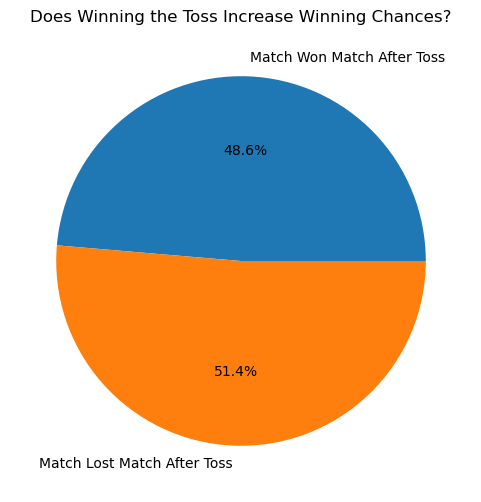

P-value: 0.9075606176124984
No strong statistical evidence that toss affects result


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest

df = pd.read_csv("IPL_data_2022.csv")


df = df[['toss_winner', 'match_winner']].dropna()

# Check if toss winner also won the match
df['toss_win_match'] = df['toss_winner'] == df['match_winner']


toss_advantage = df['toss_win_match'].mean() * 100
print(f"Toss winner also won match: {toss_advantage:.2f}%")

# Count values
wins_after_toss = df['toss_win_match'].sum()
loss_after_toss = len(df) - wins_after_toss

print("Match Wins after winning toss:", wins_after_toss)
print("MatchLoss after winning toss:", loss_after_toss)


# Pie-Chart Create

labels = ['Match Won Match After Toss', 'Match Lost Match After Toss']
values = [wins_after_toss, loss_after_toss]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Does Winning the Toss Increase Winning Chances?")
plt.show()


# Statistical Test (Binomial Test)
total_matches = len(df)
result = binomtest(wins_after_toss, total_matches, 0.5)

print("P-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Toss has statistically significant impact")
else:
    print("No strong statistical evidence that toss affects result")


# Which team won the highest number of toss?

Hyderabad    71.428571
Mumbai       64.285714
Gujarat      62.500000
Delhi        57.142857
Kolkata      57.142857
Banglore     50.000000
Lucknow      46.666667
Chennai      42.857143
Punjab       28.571429
Rajasthan    23.529412
Name: count, dtype: float64


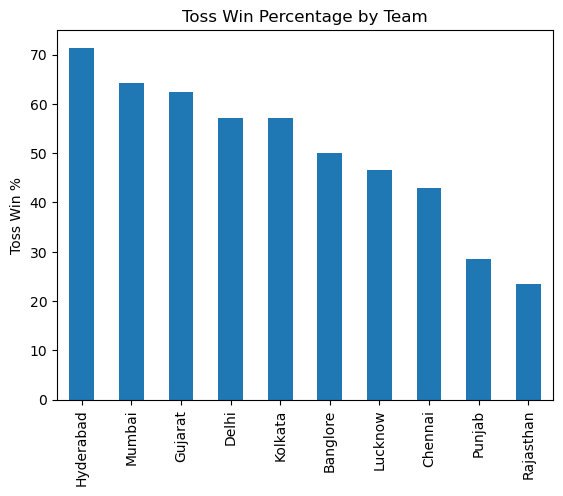

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("IPL_data_2022.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Count total matches played by each team
matches_played = pd.concat([df['team1'], df['team2']]).value_counts()

# Count toss wins
toss_wins = df['toss_winner'].value_counts()

# Calculate toss win percentage
toss_win_rate = (toss_wins / matches_played) * 100
toss_win_rate = toss_win_rate.sort_values(ascending=False)

print(toss_win_rate)

# Plot
plt.figure()
toss_win_rate.plot(kind='bar')
plt.title("Toss Win Percentage by Team")
plt.ylabel("Toss Win %")
plt.show()
